## 1: Import required packages & functions <a class="anchor" id="chapter1"></a>

In [1]:
print('Importing libraries')

%reset -f

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# clear all variables
for i in list(globals().keys()):
    if(i[0] != '_'):
        exec('del {}'.format(i))

#suppress future warnings -- not really a good idea 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import required dependencies
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
from keras.models import Model
from keras.layers import Input, Dense
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, silhouette_score
import csv
import xlrd
import math
from matplotlib import figure
from IPython.display import FileLink, FileLinks
from IPython.display import set_matplotlib_formats
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#import utils
#from utils import encode_features_v3

set_matplotlib_formats('png', 'pdf') # uses vector figures in pdf exports --
plt.style.use('seaborn-pastel')

# create a folder
def create_folder(folder):
    import os     
    try: 
        os.mkdir(folder) 
    except FileExistsError:
        print("Directory [ %s ] already exists"%folder)

Importing libraries


## 2: Cluster Heatmap For Top Neuropathology & Clinical Features  <a class="anchor" id="chapter2"></a>

This is to show how the top 8 neuropathology and 10 associated clinical features with the three clusters performs in terms of the misclassified cases

In [2]:
new_balanced_no_AB = pd.read_csv('Classification/new_balanced_no_AB.csv')
clinical_features = pd.read_csv('../data/clinical signature features.csv',header = 0) # read clinical dataset
clinical_with_memberships = pd.read_csv('Classification/selected_additinal_features_with_memberships.csv',header = 0) # read clinical dataset

# This is for top 8 neuropathology and 10 selected cilincal features
new_balanced_no_AB = new_balanced_no_AB.applymap(np.int64).copy()
selected_patho_clinical = new_balanced_no_AB.iloc[:,0:9].merge(clinical_with_memberships[clinical_features.feature], on=['Case'])

selected_patho_clinical

Case  BraakStage  BrainNetStage  CAAType  CAAMeningeal  ThalStage  \
0    27491           4              3        2             7          5   
1       17           2              1        0             0          2   
2     6909           2              2        0             0          0   
3        4           3              3        0             0          3   
4       65           3              2        0             0          0   
..     ...         ...            ...      ...           ...        ...   
109     73           4              4        1             5          3   
110    114           4              3        1             9          3   
111  10596           4              4        1             9          5   
112     24           4              3        1             8          4   
113     96           5              6        1             0          5   

     CAAParenc  CAATotalSev  MTSPETSA  amyparf  brain weight  lossh   age  \
0            6           13         1        0     -0.046747      1  91.0   
1            0            0         0        0     -0.933614      0  93.0   
2            0            0         1        0      0.396687      1  86.0   
3            0            0         0        0     -0.032501      0  85.0   
4            0            0         1        0     -0.750937      0  99.0   
..         ...          ...       ...      ...           ...    ...   ...   
109          4            9         1        0      1.564024      1  94.0   
110          7           16         1        1      0.765762      0  99.0   
111          8           17         0        1      0.685936      1  97.0   
112          4           12         0        0      0.127152      0  76.0   
113          1            1         0        0     -0.990416      2  87.0   

     lewys  gliosh  sex  losss  tanglest  vrspc  
0        3       0    0      3         0      0  
1        0       0    0      2         0      1  
2        0       0    0      0         0      1  
3        0       0    1      1         1      0  
4        0       0    1      1         1      1  
..     ...     ...  ...    ...       ...    ...  
109      0       0    1      1         1      0  
110      0       0    1      1         1      1  
111      0       0    1      0         3      1  
112      0       0    1      1         1      0  
113      0       1    1      2         3      0  

[114 rows x 19 columns]

In [3]:
new_balanced_no_AB = pd.read_csv('Classification/new_balanced_no_AB.csv')
selected_patho_clinical["dem_nver4"] = new_balanced_no_AB.dem_nver4

membership_data = pd.DataFrame(selected_patho_clinical).copy()
# selected_patho_clinical.replace({'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
# selected_patho_clinical.replace({'Yes':1}, inplace=True)
# selected_patho_clinical.replace({'Men':0, 'Women':1}, inplace=True)

# drop case features
selected_patho_clinical = selected_patho_clinical.drop(columns=['Case'])

numeric_cols=['age', 'brain weight']                     # numeric features
selected_patho_clinical[numeric_cols]=MinMaxScaler().fit_transform(selected_patho_clinical[numeric_cols])  # transform

selected_patho_clinical

BraakStage  BrainNetStage  CAAType  CAAMeningeal  ThalStage  CAAParenc  \
0             4              3        2             7          5          6   
1             2              1        0             0          2          0   
2             2              2        0             0          0          0   
3             3              3        0             0          3          0   
4             3              2        0             0          0          0   
..          ...            ...      ...           ...        ...        ...   
109           4              4        1             5          3          4   
110           4              3        1             9          3          7   
111           4              4        1             9          5          8   
112           4              3        1             8          4          4   
113           5              6        1             0          5          1   

     CAATotalSev  MTSPETSA  amyparf  brain weight  lossh       age  lewys  \
0             13         1        0      0.579692      1  0.675676      3   
1              0         0        0      0.454092      0  0.729730      0   
2              0         1        0      0.642492      1  0.540541      0   
3              0         0        0      0.581710      0  0.513514      0   
4              0         1        0      0.479963      0  0.891892      0   
..           ...       ...      ...           ...    ...       ...    ...   
109            9         1        0      0.807812      1  0.756757      0   
110           16         1        1      0.694761      0  0.891892      0   
111           17         0        1      0.683456      1  0.837838      0   
112           12         0        0      0.604320      0  0.270270      0   
113            1         0        0      0.446048      2  0.567568      0   

     gliosh  sex  losss  tanglest  vrspc  dem_nver4  
0         0    0      3         0      0          1  
1         0    0      2         0      1          1  
2         0    0      0         0      1          0  
3         0    1      1         1      0          0  
4         0    1      1         1      1          1  
..      ...  ...    ...       ...    ...        ...  
109       0    1      1         1      0          1  
110       0    1      1         1      1          1  
111       0    1      0         3      1          1  
112       0    1      1         1      0          0  
113       1    1      2         3      0          1  

[114 rows x 19 columns]

## 3: Function to predict for all classifiers   <a class="anchor" id="chapter3"></a>

In [4]:

dataset = pd.DataFrame(selected_patho_clinical).copy()
X = dataset.iloc[:,:-1]
y = np.ravel(dataset.iloc[:,-1])

In [5]:
logreg_fscore_mean=[]; logreg_precision_mean=[]; logreg_recall_mean=[]; logreg_balanced_acc_mean=[]
logreg_sens_mean=[]; logreg_spec_mean=[]; logreg_acc_mean=[]; 
logreg_average_precision_mean=[]; logreg_auc_mean=[];

dt_fscore_mean=[]; dt_precision_mean=[]; dt_recall_mean=[]; dt_balanced_acc_mean=[]
dt_sens_mean=[]; dt_spec_mean=[]; dt_acc_mean=[]; 
dt_average_precision_mean=[]; dt_auc_mean=[]

knn_fscore_mean=[]; knn_precision_mean=[]; knn_recall_mean=[]; knn_balanced_acc_mean=[]
knn_sens_mean=[]; knn_spec_mean=[]; knn_acc_mean=[]; 
knn_average_precision_mean=[]; knn_auc_mean=[]

lda_fscore_mean=[]; lda_precision_mean=[]; lda_recall_mean=[]; lda_balanced_acc_mean=[]
lda_sens_mean=[]; lda_spec_mean=[]; lda_acc_mean=[]; 
lda_average_precision_mean=[]; lda_auc_mean=[]

gnb_fscore_mean=[]; gnb_precision_mean=[]; gnb_recall_mean=[]; gnb_balanced_acc_mean=[]
gnb_sens_mean=[]; gnb_spec_mean=[]; gnb_acc_mean=[]; 
gnb_average_precision_mean=[]; gnb_auc_mean=[]

svm_rbf_fscore_mean=[]; svm_rbf_precision_mean=[]; svm_rbf_recall_mean=[]; svm_rbf_balanced_acc_mean=[] 
svm_rbf_sens_mean=[]; svm_rbf_spec_mean=[]; svm_rbf_acc_mean=[]; 
svm_rbf_average_precision_mean=[]; svm_rbf_auc_mean=[]

svm_linear_fscore_mean=[]; svm_linear_precision_mean=[]; svm_linear_recall_mean=[]; svm_linear_balanced_acc_mean=[] 
svm_linear_sens_mean=[]; svm_linear_spec_mean=[]; svm_linear_acc_mean=[];
svm_linear_average_precision_mean=[]; svm_linear_auc_mean=[];


In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict, StratifiedKFold 

# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

# read dataset
X = dataset.iloc[:,:-1]
y = np.ravel(dataset.iloc[:,-1])

all_y_pred = pd.DataFrame()

logreg_y_pred = pd.DataFrame(); dt_y_pred = pd.DataFrame(); knn_y_pred = pd.DataFrame(); lda_y_pred = pd.DataFrame();
gnb_y_pred = pd.DataFrame(); svm_rbf_y_pred = pd.DataFrame(); svm_linear_y_pred = pd.DataFrame();

# create loocv procedure
cv = LeaveOneOut()
print("subset:")
for num in range(0,len(X.columns)):
    print(num," \b", end="")
    
    #get data and target
    X_subset = X.iloc[:,num::-1]
    
    # feature scaling
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_subset)

    logreg = LogisticRegression(random_state = 220)
    dt = DecisionTreeClassifier(random_state = 220)
    knn = KNeighborsClassifier()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    svm_rbf = SVC(kernel='rbf', random_state = 220)
    svm_linear = SVC(kernel='linear', random_state = 220)
    
    # calculate cross validation score for each of the fitted models 
    for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:   
        # enumerate splits
        y_true, y_pred = list(), list()
        for train_ix, test_ix in cv.split(X_scaled):
            # split data
            X_train, X_test = X_scaled[train_ix, :], X_scaled[test_ix, :]
            y_train, y_test = y[train_ix], y[test_ix]
            # fit model
            exec("%s"%model+".fit(X_train, y_train)")
            # evaluate model
            exec("yhat = %s"%model+".predict(X_test)")
            # store
            y_true.append(y_test[0])
            y_pred.append(yhat[0])
        exec("%s"%model+"_y_pred['%s"%model+"_%d"%(num+1)+"'] = y_pred")
        
        exec("%s"%model+"_fscore_mean.append(f1_score(y, y_pred))") 
        exec("%s"%model+"_precision_mean.append(precision_score(y, y_pred))")
        exec("%s"%model+"_recall_mean.append(recall_score(y, y_pred))")
        exec("%s"%model+"_balanced_acc_mean.append(balanced_accuracy_score(y, y_pred))")
        exec("%s"%model+"_acc_mean.append(accuracy_score(y, y_pred))")
        exec("%s"%model+"_average_precision_mean.append(average_precision_score(y, y_pred))")
#         exec("sens, spec, auc_value = perf_eval(y, y_pred)")
#         exec("%s"%model+"_sens_mean.append(sens)") 
#         exec("%s"%model+"_spec_mean.append(spec)") 
#         exec("%s"%model+"_auc_mean.append(auc_value)")

subset:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 

## 4: Binary Table Matrix   <a class="anchor" id="chapter4"></a>

In [7]:
y_pred = pd.DataFrame()
all_y_pred = pd.DataFrame()
for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:
    exec("all_y_pred = pd.concat([all_y_pred, %s"%model+"_y_pred], axis=1)")

In [8]:
#------------------ FUNCTION -----------------------#
def binary_table(y_pred, y_true):
    data = pd.DataFrame(y_pred)
    data['y_true'] = y_true['dem_nver4']

    cond_1 = (data.iloc[:,1] == 1) & (data.iloc[:,0] == 1)
    cond_2 = (data.iloc[:,1] == 0) & (data.iloc[:,0] == 0)
    cond_3 = (data.iloc[:,1] == 1) & (data.iloc[:,0] != 1)
    cond_4 = (data.iloc[:,1] == 0) & (data.iloc[:,0] != 0)

    conditions = [cond_1,cond_2,cond_3,cond_4]
    choices = [0,0,1,-1]

    data.drop('y_true', axis=1, inplace=True)
    data.iloc[:,0] = np.select(conditions, choices, default='null')
    return data
#---------------------------------------------------#

X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.dem_nver4)

all_binary_result = pd.DataFrame(y)

for classifier in ['logreg','dt','knn','lda','gnb','svm_rbf','svm_linear']:
    for subset in np.arange(1, len(X.columns)+1, 1):
        exec("%s"%classifier+"_%s"%subset+" = binary_table(all_y_pred['%s"%classifier+"_%s"%subset+"'],y)")
        exec("all_binary_result['%s"%classifier+"_%s"%subset+"'] = %s"%classifier+"_%s"%subset)

In [9]:
all_binary_result

dem_nver4 logreg_1 logreg_2 logreg_3 logreg_4 logreg_5 logreg_6 logreg_7  \
0            1        0        0        0        0        0        0        0   
1            1        1        1        1        1        1        1        1   
2            0        0        0        0        0        0        0        0   
3            0        0       -1       -1        0        0        0        0   
4            1        1        1        1        1        1        1        1   
..         ...      ...      ...      ...      ...      ...      ...      ...   
109          1        0        0        0        0        0        0        0   
110          1        0        0        0        0        0        0        0   
111          1        0        0        0        0        0        0        0   
112          0       -1       -1       -1       -1       -1       -1       -1   
113          1        0        0        0        0        0        0        0   

    logreg_8 logreg_9  ... svm_linear_9 svm_linear_10 svm_linear_11  \
0          0        0  ...            0             0             0   
1          1        1  ...            1             1             1   
2          0        0  ...           -1            -1            -1   
3          0        0  ...            0             0             0   
4          1        1  ...            0             0             0   
..       ...      ...  ...          ...           ...           ...   
109        0        0  ...            0             0             0   
110        0        0  ...            0             0             0   
111        0        0  ...            0             1             1   
112       -1       -1  ...            0            -1             0   
113        0        0  ...            0             0             0   

    svm_linear_12 svm_linear_13 svm_linear_14 svm_linear_15 svm_linear_16  \
0               0             0             0             0             0   
1               1             1             1             1             1   
2              -1            -1            -1            -1             0   
3               0             0             0             0             0   
4               0             0             0             0             0   
..            ...           ...           ...           ...           ...   
109             0             0             0             0             0   
110             0             0             0             0             0   
111             0             0             0             0             1   
112             0             0             0             0             0   
113             0             0             0             0             0   

    svm_linear_17 svm_linear_18  
0               0             0  
1               1             1  
2               0             0  
3               0             0  
4               0             0  
..            ...           ...  
109             0             0  
110             0             0  
111             0             0  
112             0             0  
113             0             0  

[114 rows x 127 columns]

In [10]:
from pandas.plotting import table 
all_binary_result.drop('dem_nver4', axis=1,inplace=True)

aa = all_binary_result.style.applymap(lambda x: "background-color: red" if x == '-1' else "background-color: blue" if x == '1' else "background-color: white")

all_binary_result = all_binary_result.astype(int)
aaa_test = all_binary_result

In [11]:
aa

## 5: Hierarchical Clustering   <a class="anchor" id="chapter5"></a>

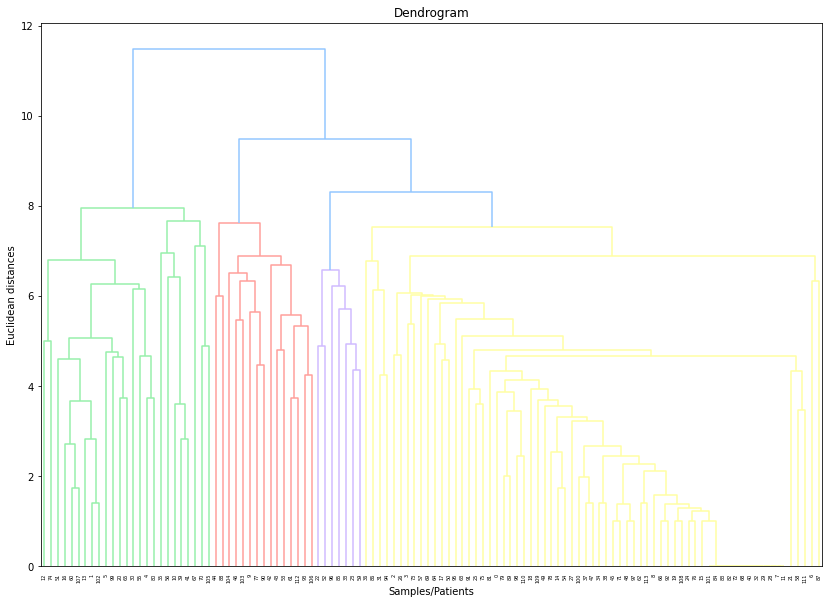

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

y_hc=hc.fit(all_binary_result)

#get rows' clusters
membership = hc.labels_
binary_clusters = pd.DataFrame(all_binary_result).copy()
binary_clusters['clusters'] = membership


fig=plt.figure(figsize=(14, 10)) 
dendrogram = sch.dendrogram(sch.linkage(all_binary_result, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Samples/Patients')
plt.ylabel('Euclidean distances')
plt.axhline(y=14, color='r', linestyle='--')
plt.show()

In [13]:
import seaborn as sns; sns.set(color_codes=True)
heatmap_binary = all_binary_result
heatmap_binary.columns = pd.MultiIndex.from_product([['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear'], 
                                                     np.arange(1, len(X.columns)+1, 1)], 
                                                   names=['Classifiers', 'Subsets of Features'])
# ### For tree colors
clusters = binary_clusters.pop("clusters")

In [14]:
# save membership to csv file for clinical signatures
# dataset_membership = pd.read_csv('Classification/new_balanced_no_AB.csv');
membership_data['membership'] = membership
membership_data.to_csv(r'Classification/dataset_membership_with_case2.csv', index=False, mode = 'w')


#### [0 - FN - 16] [1 - FP - 25] [2 - TP&TN - 73]

In [15]:
clusters.value_counts()

0    74
1    25
2    15
Name: clusters, dtype: int64

## 6: Cluster Heatmap  <a class="anchor" id="chapter6"></a>

/Users/mohammed/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


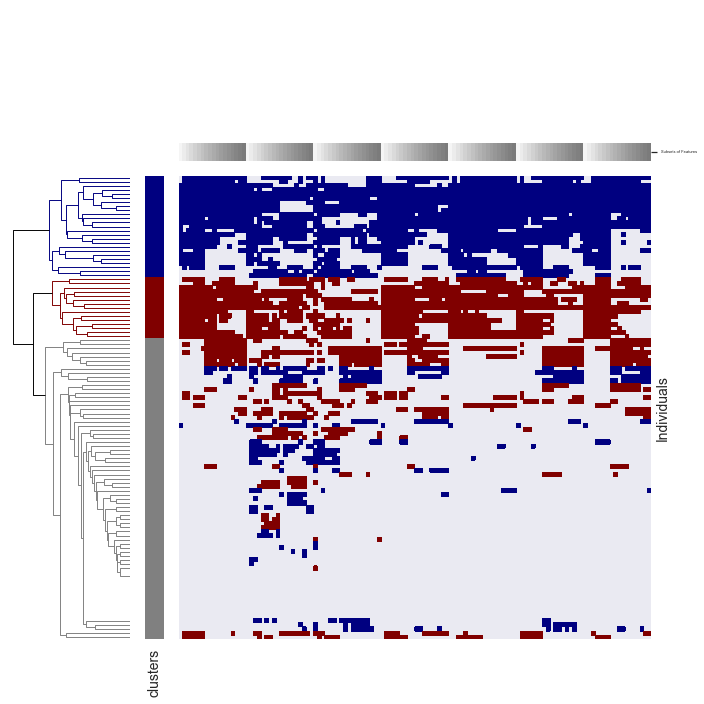

In [162]:
from matplotlib.colors import LinearSegmentedColormap
#### classifiers level
classi_labels = heatmap_binary.columns.get_level_values("Classifiers")
classi_pal = sns.cubehelix_palette(classi_labels.unique().size, light=.9, dark=.1, reverse=True, start=1, rot=-2)
classi_lut = dict(zip(map(str, classi_labels.unique()), classi_pal))

#### Create index using the columns for classifiers
classi_colors = pd.Series(classi_labels, index=heatmap_binary.columns).map(classi_lut)

#### subsets level
subset_labels = heatmap_binary.columns.get_level_values("Subsets of Features")
subset_pal = sns.cubehelix_palette(subset_labels.unique().size, as_cmap=True, hue=0, start=0.3, light=1.0, dark=0.0,rot=-10.0, gamma=10.0)

#### Create index using the columns for subsets
subset_colors = pd.Series(subset_labels, index=heatmap_binary.columns).map(subset_pal)

# classi_subset_colors = pd.DataFrame(subset_colors)
classi_subset_colors = pd.DataFrame(subset_colors)#pd.DataFrame(classi_colors).join(pd.DataFrame(subset_colors))

### decoding colors for heatmap and dendograms
red=(0.5, 0.0, 0.0, 1.0)
blue=(0.0, 0.0, 0.5, 1.0)
black=(0.0, 0.0, 0.0, 0.0)
white=(1,1,1,1)
grey=(0.5, 0.5, 0.5, 1.0)

### tree clusters colors

clusters_lut = dict(zip(clusters.unique(), [grey, blue, red]))
row_colors = clusters.map(clusters_lut)

''''''''''''''''''
plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=4)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels

plt.rcParams['savefig.facecolor']='white'

myColors = (red,black, blue)
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))


# color bar keyword arguments
cbar_kws = {"shrink":1,
            'ticks': ['f',0,-1], # set ticks of color bar
            'label':'Color Bar'}

g = sns.clustermap(all_binary_result,
                    method= 'average',
                    metric= "euclidean",
                    col_cluster=False,
                    row_cluster=True,
                    col_colors = classi_subset_colors,
                    row_colors=row_colors,
                    cmap=cmap,
                    tree_kws=dict(linewidths=0.95, colors=([blue]*24+[red]*14+[grey]*73+[(0,0,0,1)]*2)),
                    linewidths=0.0,
                   rasterized=True,
                   xticklabels=False, 
                   yticklabels=False, 
                   center=0) 


# ### tree leaves colors
# n_leaves = len(g.dendrogram_row.linkage)+1
# n0_ndx = len(g.dendrogram_row.linkage) - 1
# n1_ndx = int(g.dendrogram_row.linkage[n0_ndx][0])-n_leaves
# n2_ndx = int(g.dendrogram_row.linkage[n0_ndx][1])-n_leaves
# n21_ndx = int(g.dendrogram_row.linkage[n2_ndx][0])-n_leaves
# n22_ndx = int(g.dendrogram_row.linkage[n2_ndx][1])-n_leaves

# n1 = int(g.dendrogram_row.linkage[n1_ndx][3])-1
# n21 = int(g.dendrogram_row.linkage[n22_ndx][3])-1
# n22 = int(g.dendrogram_row.linkage[n21_ndx][3])-1


g.cax.set_visible(False)
g.ax_row_dendrogram.set_visible(True)
g.ax_col_dendrogram.set_visible(True)

ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("Individuals")
plt.tight_layout()

plt.show()

g.savefig('Figures/top patho + clinical signature clustermap.pdf',dpi=300, bbox_inches="tight")
g.savefig('Figures/top patho + clinical signature clustermap.png',dpi=300, bbox_inches="tight")


## 7: Held-out 32 cases for top 8 Neuropathology  <a class="anchor" id="chapter7"></a>

In [125]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score

def perf_eval(actual, predicted):
    print("actual")
    print(actual)
    print("predicted")
    print(predicted)
    # calculate confusion matrix
    cm=confusion_matrix(actual, predicted)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    print(cm)

    # calculate perf
    sens=(TP/(TP+FN))
    spec=(TN/(TN+FP))
    acc=((TP+TN)/(TP+FP+TN+FN))

    precision = TP / (TP+FP)
    recall    = TP / (TP+FN)

    F1_score = 2 * (precision * recall) / (precision + recall)
    
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted)
    auc_value = metrics.auc(fpr, tpr)
    
    return sens, spec, auc_value

In [126]:
logreg_fscore_mean=[]; logreg_precision_mean=[]; logreg_recall_mean=[]; logreg_balanced_acc_mean=[]
logreg_sens_mean=[]; logreg_spec_mean=[]; logreg_acc_mean=[]; 
logreg_average_precision_mean=[]; logreg_auc_mean=[];

dt_fscore_mean=[]; dt_precision_mean=[]; dt_recall_mean=[]; dt_balanced_acc_mean=[]
dt_sens_mean=[]; dt_spec_mean=[]; dt_acc_mean=[]; 
dt_average_precision_mean=[]; dt_auc_mean=[]

knn_fscore_mean=[]; knn_precision_mean=[]; knn_recall_mean=[]; knn_balanced_acc_mean=[]
knn_sens_mean=[]; knn_spec_mean=[]; knn_acc_mean=[]; 
knn_average_precision_mean=[]; knn_auc_mean=[]

lda_fscore_mean=[]; lda_precision_mean=[]; lda_recall_mean=[]; lda_balanced_acc_mean=[]
lda_sens_mean=[]; lda_spec_mean=[]; lda_acc_mean=[]; 
lda_average_precision_mean=[]; lda_auc_mean=[]

gnb_fscore_mean=[]; gnb_precision_mean=[]; gnb_recall_mean=[]; gnb_balanced_acc_mean=[]
gnb_sens_mean=[]; gnb_spec_mean=[]; gnb_acc_mean=[]; 
gnb_average_precision_mean=[]; gnb_auc_mean=[]

svm_rbf_fscore_mean=[]; svm_rbf_precision_mean=[]; svm_rbf_recall_mean=[]; svm_rbf_balanced_acc_mean=[] 
svm_rbf_sens_mean=[]; svm_rbf_spec_mean=[]; svm_rbf_acc_mean=[]; 
svm_rbf_average_precision_mean=[]; svm_rbf_auc_mean=[]

svm_linear_fscore_mean=[]; svm_linear_precision_mean=[]; svm_linear_recall_mean=[]; svm_linear_balanced_acc_mean=[] 
svm_linear_sens_mean=[]; svm_linear_spec_mean=[]; svm_linear_acc_mean=[];
svm_linear_average_precision_mean=[]; svm_linear_auc_mean=[];

logreg_sens_mean

[]

In [127]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict, StratifiedKFold 


# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report


# read dataset for top 8 neuropathogy features
dataset = pd.read_csv('Classification/new_balanced_no_AB.csv');
dataset.drop(labels=['Case'], axis=1, inplace=True) 
X = dataset.iloc[:,0:8]
y = np.ravel(dataset.iloc[:,-1])

#read dataset for selected additinal signature features
heldout_data = pd.read_csv('Classification/heldout_data_with_additinal.csv');
heldout_data = heldout_data.drop(columns=['Case'])#, 'age', 'brain weight'])
heldout_data.dem_nver4.replace({'No dementia':0, 'Dementia':1}, inplace=True)
X_heldout = heldout_data.iloc[:,0:8]
y_heldout = np.ravel(heldout_data.iloc[:,-1])
                    
# feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
heldout_scaled = scaler.fit_transform(X_heldout)


#creat models
logreg = LogisticRegression(random_state = 220)
dt = DecisionTreeClassifier(random_state = 220)
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
svm_rbf = SVC(kernel='rbf', random_state = 220)
svm_linear = SVC(kernel='linear', random_state = 220)


measures = pd.DataFrame(['F1-score', 'Precision', 'Recall', 'Accuracy'])

# calculate cross validation score for each of the fitted models 
for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:   

    exec("%s"%model+".fit(X_scaled, y)")
    exec("yhat = %s"%model+".predict(heldout_scaled)")
        
    exec("%s"%model+"_fscore_mean.append(f1_score(y_heldout, yhat))") 
    exec("%s"%model+"_precision_mean.append(precision_score(y_heldout, yhat))")
    exec("%s"%model+"_recall_mean.append(recall_score(y_heldout, yhat))")
    exec("%s"%model+"_balanced_acc_mean.append(balanced_accuracy_score(y_heldout, yhat))")
    exec("%s"%model+"_acc_mean.append(accuracy_score(y_heldout, yhat))")
    exec("%s"%model+"_average_precision_mean.append(average_precision_score(y_heldout, yhat))")
    
    exec("sens, spec, auc_value = perf_eval(y_heldout, yhat)")
    exec("%s"%model+"_sens_mean.append(sens)")
    exec("%s"%model+"_spec_mean.append(spec)")
#     exec("%s"%model+".append(auc_value)")
       
        

actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1]
[[ 0  0]
 [10 22]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1]
[[ 0  0]
 [12 20]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0]
[[ 0  0]
 [11 21]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1]
[[ 0  0]
 [12 20]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1]
[[ 0  0]
 [11 21]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0]
[[ 0  0]
 [

/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarni

In [128]:
logreg_sens_mean

[0.6875]

In [129]:
dt_sens_mean

[0.625]

In [130]:
knn_sens_mean

[0.65625]

In [131]:
lda_sens_mean

[0.625]

In [132]:
gnb_sens_mean

[0.65625]

In [133]:
svm_rbf_sens_mean

[0.59375]

In [134]:
svm_linear_sens_mean

[0.625]

## 8: Held-out 32 cases for top 8 Neuropathology & Additinal Signatures  <a class="anchor" id="chapter8"></a>

In [135]:
'''   create data for 114 samples '''
selected_additinal_features = pd.read_csv('Classification/selected_additinal_features_with_memberships.csv',header = 0)
clinical_singnature = pd.read_csv('../data/relevant_clinical_signatures_coefficients.csv',header = 0).features
clinical_singnature = pd.concat([pd.Series(['Case']), clinical_singnature]).reset_index(drop=True)
signature_feature_data = selected_additinal_features[clinical_singnature]

new_balanced_no_AB = pd.read_csv('Classification/new_balanced_no_AB.csv')
sample114_top8f_10nonStandard = new_balanced_no_AB.iloc[:,0:9].merge(signature_feature_data, on='Case')
sample114_top8f_10nonStandard['dem_nver4'] = new_balanced_no_AB['dem_nver4']
# sample114_top8f_10nonStandard.drop('Case', axis=1, inplace=True)
sample114_top8f_10nonStandard.to_csv(r'Classification/sample114_top8f_10nonStandard.csv',mode = 'w',index=False)

'''   create data for held-out samples '''
heldout_data_with_additinal= pd.read_csv('Classification/heldout_data_with_additinal.csv',header = 0)
heldout_data = heldout_data_with_additinal[sample114_top8f_10nonStandard.columns]


''' Adjusment of brain weight based on gender '''
women_braiwgt = heldout_data[heldout_data.sex == 'Women']
men_braiwgt = heldout_data[heldout_data.sex == 'Men']
gender_missing = heldout_data[heldout_data.sex.isnull()]

#Calculate z-score by mean
from scipy import stats
women_braiwgt_zscore = stats.zscore(women_braiwgt['brain weight'], nan_policy='omit')
men_braiwgt_zscore = stats.zscore(men_braiwgt['brain weight'], nan_policy='omit')
women_braiwgt['brain weight'] = women_braiwgt_zscore
men_braiwgt['brain weight'] = men_braiwgt_zscore

heldout_data = pd.concat([women_braiwgt, men_braiwgt])
heldout_data = pd.concat([heldout_data, gender_missing])
heldout_data.sort_values(by='Case', inplace=True)

heldout_data.replace({'No':0, 'Mild':1, 'Mod':2, 'Sev':3}, inplace=True)
heldout_data.replace({'Men':0, 'Women':1}, inplace=True)
heldout_data.replace({"Don't know" :-1}, inplace=True)
heldout_data.replace({'Yes':1}, inplace=True)
heldout_data.replace({'Dementia':1}, inplace=True)

heldout_top8f_10nonStandard = pd.DataFrame(heldout_data).copy()
heldout_top8f_10nonStandard.to_csv(r'Classification/heldout_top8f_10nonStandard.csv',mode = 'w',index=False)


/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
logreg_fscore_mean=[]; logreg_precision_mean=[]; logreg_recall_mean=[]; logreg_balanced_acc_mean=[]
logreg_sens_mean=[]; logreg_spec_mean=[]; logreg_acc_mean=[]; 
logreg_average_precision_mean=[]; logreg_auc_mean=[];

dt_fscore_mean=[]; dt_precision_mean=[]; dt_recall_mean=[]; dt_balanced_acc_mean=[]
dt_sens_mean=[]; dt_spec_mean=[]; dt_acc_mean=[]; 
dt_average_precision_mean=[]; dt_auc_mean=[]

knn_fscore_mean=[]; knn_precision_mean=[]; knn_recall_mean=[]; knn_balanced_acc_mean=[]
knn_sens_mean=[]; knn_spec_mean=[]; knn_acc_mean=[]; 
knn_average_precision_mean=[]; knn_auc_mean=[]

lda_fscore_mean=[]; lda_precision_mean=[]; lda_recall_mean=[]; lda_balanced_acc_mean=[]
lda_sens_mean=[]; lda_spec_mean=[]; lda_acc_mean=[]; 
lda_average_precision_mean=[]; lda_auc_mean=[]

gnb_fscore_mean=[]; gnb_precision_mean=[]; gnb_recall_mean=[]; gnb_balanced_acc_mean=[]
gnb_sens_mean=[]; gnb_spec_mean=[]; gnb_acc_mean=[]; 
gnb_average_precision_mean=[]; gnb_auc_mean=[]

svm_rbf_fscore_mean=[]; svm_rbf_precision_mean=[]; svm_rbf_recall_mean=[]; svm_rbf_balanced_acc_mean=[] 
svm_rbf_sens_mean=[]; svm_rbf_spec_mean=[]; svm_rbf_acc_mean=[]; 
svm_rbf_average_precision_mean=[]; svm_rbf_auc_mean=[]

svm_linear_fscore_mean=[]; svm_linear_precision_mean=[]; svm_linear_recall_mean=[]; svm_linear_balanced_acc_mean=[] 
svm_linear_sens_mean=[]; svm_linear_spec_mean=[]; svm_linear_acc_mean=[];
svm_linear_average_precision_mean=[]; svm_linear_auc_mean=[];

logreg_sens_mean

[]

In [137]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict, StratifiedKFold 


# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report


# read 114 samples dataset for top 8 neuropathogy features and 10 non-standard pathologies features
dataset = pd.read_csv('Classification/sample114_top8f_10nonStandard.csv');
dataset.drop(labels=['Case'], axis=1, inplace=True) 
X = dataset.iloc[:,:-1]
y = np.ravel(dataset.iloc[:,-1])

#read held-out dataset for top 8 neuropathogy features and 10 non-standard pathologies features
heldout_data = pd.read_csv('Classification/heldout_top8f_10nonStandard.csv');
heldout_data = heldout_data.drop(columns=['Case'])#, 'age', 'brain weight'])
X_heldout = heldout_data.iloc[:,:-1]
y_heldout = np.ravel(heldout_data.iloc[:,-1])
                    
# feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
heldout_scaled = scaler.fit_transform(X_heldout)


#creat models
logreg = LogisticRegression(random_state = 220)
dt = DecisionTreeClassifier(random_state = 220)
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
svm_rbf = SVC(kernel='rbf', random_state = 220)
svm_linear = SVC(kernel='linear', random_state = 220)


measures = pd.DataFrame(['F1-score', 'Precision', 'Recall', 'Accuracy'])

# calculate cross validation score for each of the fitted models 
for model in ['logreg', 'dt', 'knn', 'lda', 'gnb', 'svm_rbf', 'svm_linear']:   

    exec("%s"%model+".fit(X_scaled, y)")
    exec("yhat = %s"%model+".predict(heldout_scaled)")
        
    exec("%s"%model+"_fscore_mean.append(f1_score(y_heldout, yhat))") 
    exec("%s"%model+"_precision_mean.append(precision_score(y_heldout, yhat))")
    exec("%s"%model+"_recall_mean.append(recall_score(y_heldout, yhat))")
    exec("%s"%model+"_balanced_acc_mean.append(balanced_accuracy_score(y_heldout, yhat))")
    exec("%s"%model+"_acc_mean.append(accuracy_score(y_heldout, yhat))")
    exec("%s"%model+"_average_precision_mean.append(average_precision_score(y_heldout, yhat))")
    
    exec("sens, spec, auc_value = perf_eval(y_heldout, yhat)")
    exec("%s"%model+"_sens_mean.append(sens)")
    exec("%s"%model+"_spec_mean.append(spec)")
#     exec("%s"%model+".append(auc_value)")
       
        

actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1]
[[ 0  0]
 [ 6 26]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1]
[[ 0  0]
 [ 8 24]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1]
[[ 0  0]
 [11 21]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1]
[[ 0  0]
 [ 9 23]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1]
[[ 0  0]
 [ 9 23]]
actual
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predicted
[1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1]
[[ 0  0]
 [

/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/Users/mohammed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/Users/mohammed/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:800: UndefinedMetricWarni

In [138]:
logreg_sens_mean

[0.8125]

In [139]:
dt_sens_mean

[0.75]

In [140]:
knn_sens_mean

[0.65625]

In [141]:
lda_sens_mean

[0.71875]

In [142]:
gnb_sens_mean

[0.71875]

In [143]:
svm_rbf_sens_mean

[0.6875]

In [144]:
svm_linear_sens_mean

[0.71875]

In [145]:
selected_patho_clinical

BraakStage  BrainNetStage  CAAType  CAAMeningeal  ThalStage  CAAParenc  \
0             4              3        2             7          5          6   
1             2              1        0             0          2          0   
2             2              2        0             0          0          0   
3             3              3        0             0          3          0   
4             3              2        0             0          0          0   
..          ...            ...      ...           ...        ...        ...   
109           4              4        1             5          3          4   
110           4              3        1             9          3          7   
111           4              4        1             9          5          8   
112           4              3        1             8          4          4   
113           5              6        1             0          5          1   

     CAATotalSev  MTSPETSA  amyparf  brain weight  lossh       age  lewys  \
0             13         1        0      0.579692      1  0.675676      3   
1              0         0        0      0.454092      0  0.729730      0   
2              0         1        0      0.642492      1  0.540541      0   
3              0         0        0      0.581710      0  0.513514      0   
4              0         1        0      0.479963      0  0.891892      0   
..           ...       ...      ...           ...    ...       ...    ...   
109            9         1        0      0.807812      1  0.756757      0   
110           16         1        1      0.694761      0  0.891892      0   
111           17         0        1      0.683456      1  0.837838      0   
112           12         0        0      0.604320      0  0.270270      0   
113            1         0        0      0.446048      2  0.567568      0   

     gliosh  sex  losss  tanglest  vrspc  dem_nver4  
0         0    0      3         0      0          1  
1         0    0      2         0      1          1  
2         0    0      0         0      1          0  
3         0    1      1         1      0          0  
4         0    1      1         1      1          1  
..      ...  ...    ...       ...    ...        ...  
109       0    1      1         1      0          1  
110       0    1      1         1      1          1  
111       0    1      0         3      1          1  
112       0    1      1         1      0          0  
113       1    1      2         3      0          1  

[114 rows x 19 columns]

In [229]:
dataset_membership_with_case2 = pd.read_csv('Classification/dataset_membership_with_case2.csv',header = 0)
features = ['age','amyparf','brain weight','gliosh','lewys','lossh','losss','sex','tanglest','vrspc', 'dem_nver4', 'membership']
dataset_membership_with_case2 = dataset_membership_with_case2[features]
dataset_membership_with_case2.membership.replace({0:'TP&TN', 1:'FP', 2:'FN'}, inplace=True)
dataset_membership_with_case2.vrspc.replace({0:'No', 1:'Yes'}, inplace=True)
dataset_membership_with_case2.sex.replace({0:'Men', 1:'Women'}, inplace=True)
dataset_membership_with_case2.dem_nver4.replace({0:'No dementia', 1:'Dementia'}, inplace=True)
dataset_membership_with_case2.replace({0:'No', 1:'Mild', 2:'Moderate', 3:'Severe'}, inplace=True)
dataset_membership_with_case2['cluster'] = dataset_membership_with_case2.membership
dataset_membership_with_case2.cluster.replace({'FP':'False Positive', 
                                        'FN':'False Negative', 
                                        'TP&TN':'Correctly Classified'},
                                       inplace=True)

dataset_membership_with_case2


age amyparf  brain weight gliosh   lewys     lossh     losss    sex  \
0    91.0      No     -0.046747     No  Severe      Mild    Severe    Men   
1    93.0      No     -0.933614     No      No        No  Moderate    Men   
2    86.0      No      0.396687     No      No      Mild        No    Men   
3    85.0      No     -0.032501     No      No        No      Mild  Women   
4    99.0      No     -0.750937     No      No        No      Mild  Women   
..    ...     ...           ...    ...     ...       ...       ...    ...   
109  94.0      No      1.564024     No      No      Mild      Mild  Women   
110  99.0    Mild      0.765762     No      No        No      Mild  Women   
111  97.0    Mild      0.685936     No      No      Mild        No  Women   
112  76.0      No      0.127152     No      No        No      Mild  Women   
113  87.0      No     -0.990416   Mild      No  Moderate  Moderate  Women   

    tanglest vrspc    dem_nver4 membership               cluster  
0         No    No     Dementia      TP&TN  Correctly Classified  
1         No   Yes     Dementia         FP        False Positive  
2         No   Yes  No dementia      TP&TN  Correctly Classified  
3       Mild    No  No dementia      TP&TN  Correctly Classified  
4       Mild   Yes     Dementia         FP        False Positive  
..       ...   ...          ...        ...                   ...  
109     Mild    No     Dementia      TP&TN  Correctly Classified  
110     Mild   Yes     Dementia      TP&TN  Correctly Classified  
111   Severe   Yes     Dementia      TP&TN  Correctly Classified  
112     Mild    No  No dementia         FN        False Negative  
113   Severe    No     Dementia      TP&TN  Correctly Classified  

[114 rows x 13 columns]

<Figure size 432x288 with 0 Axes>

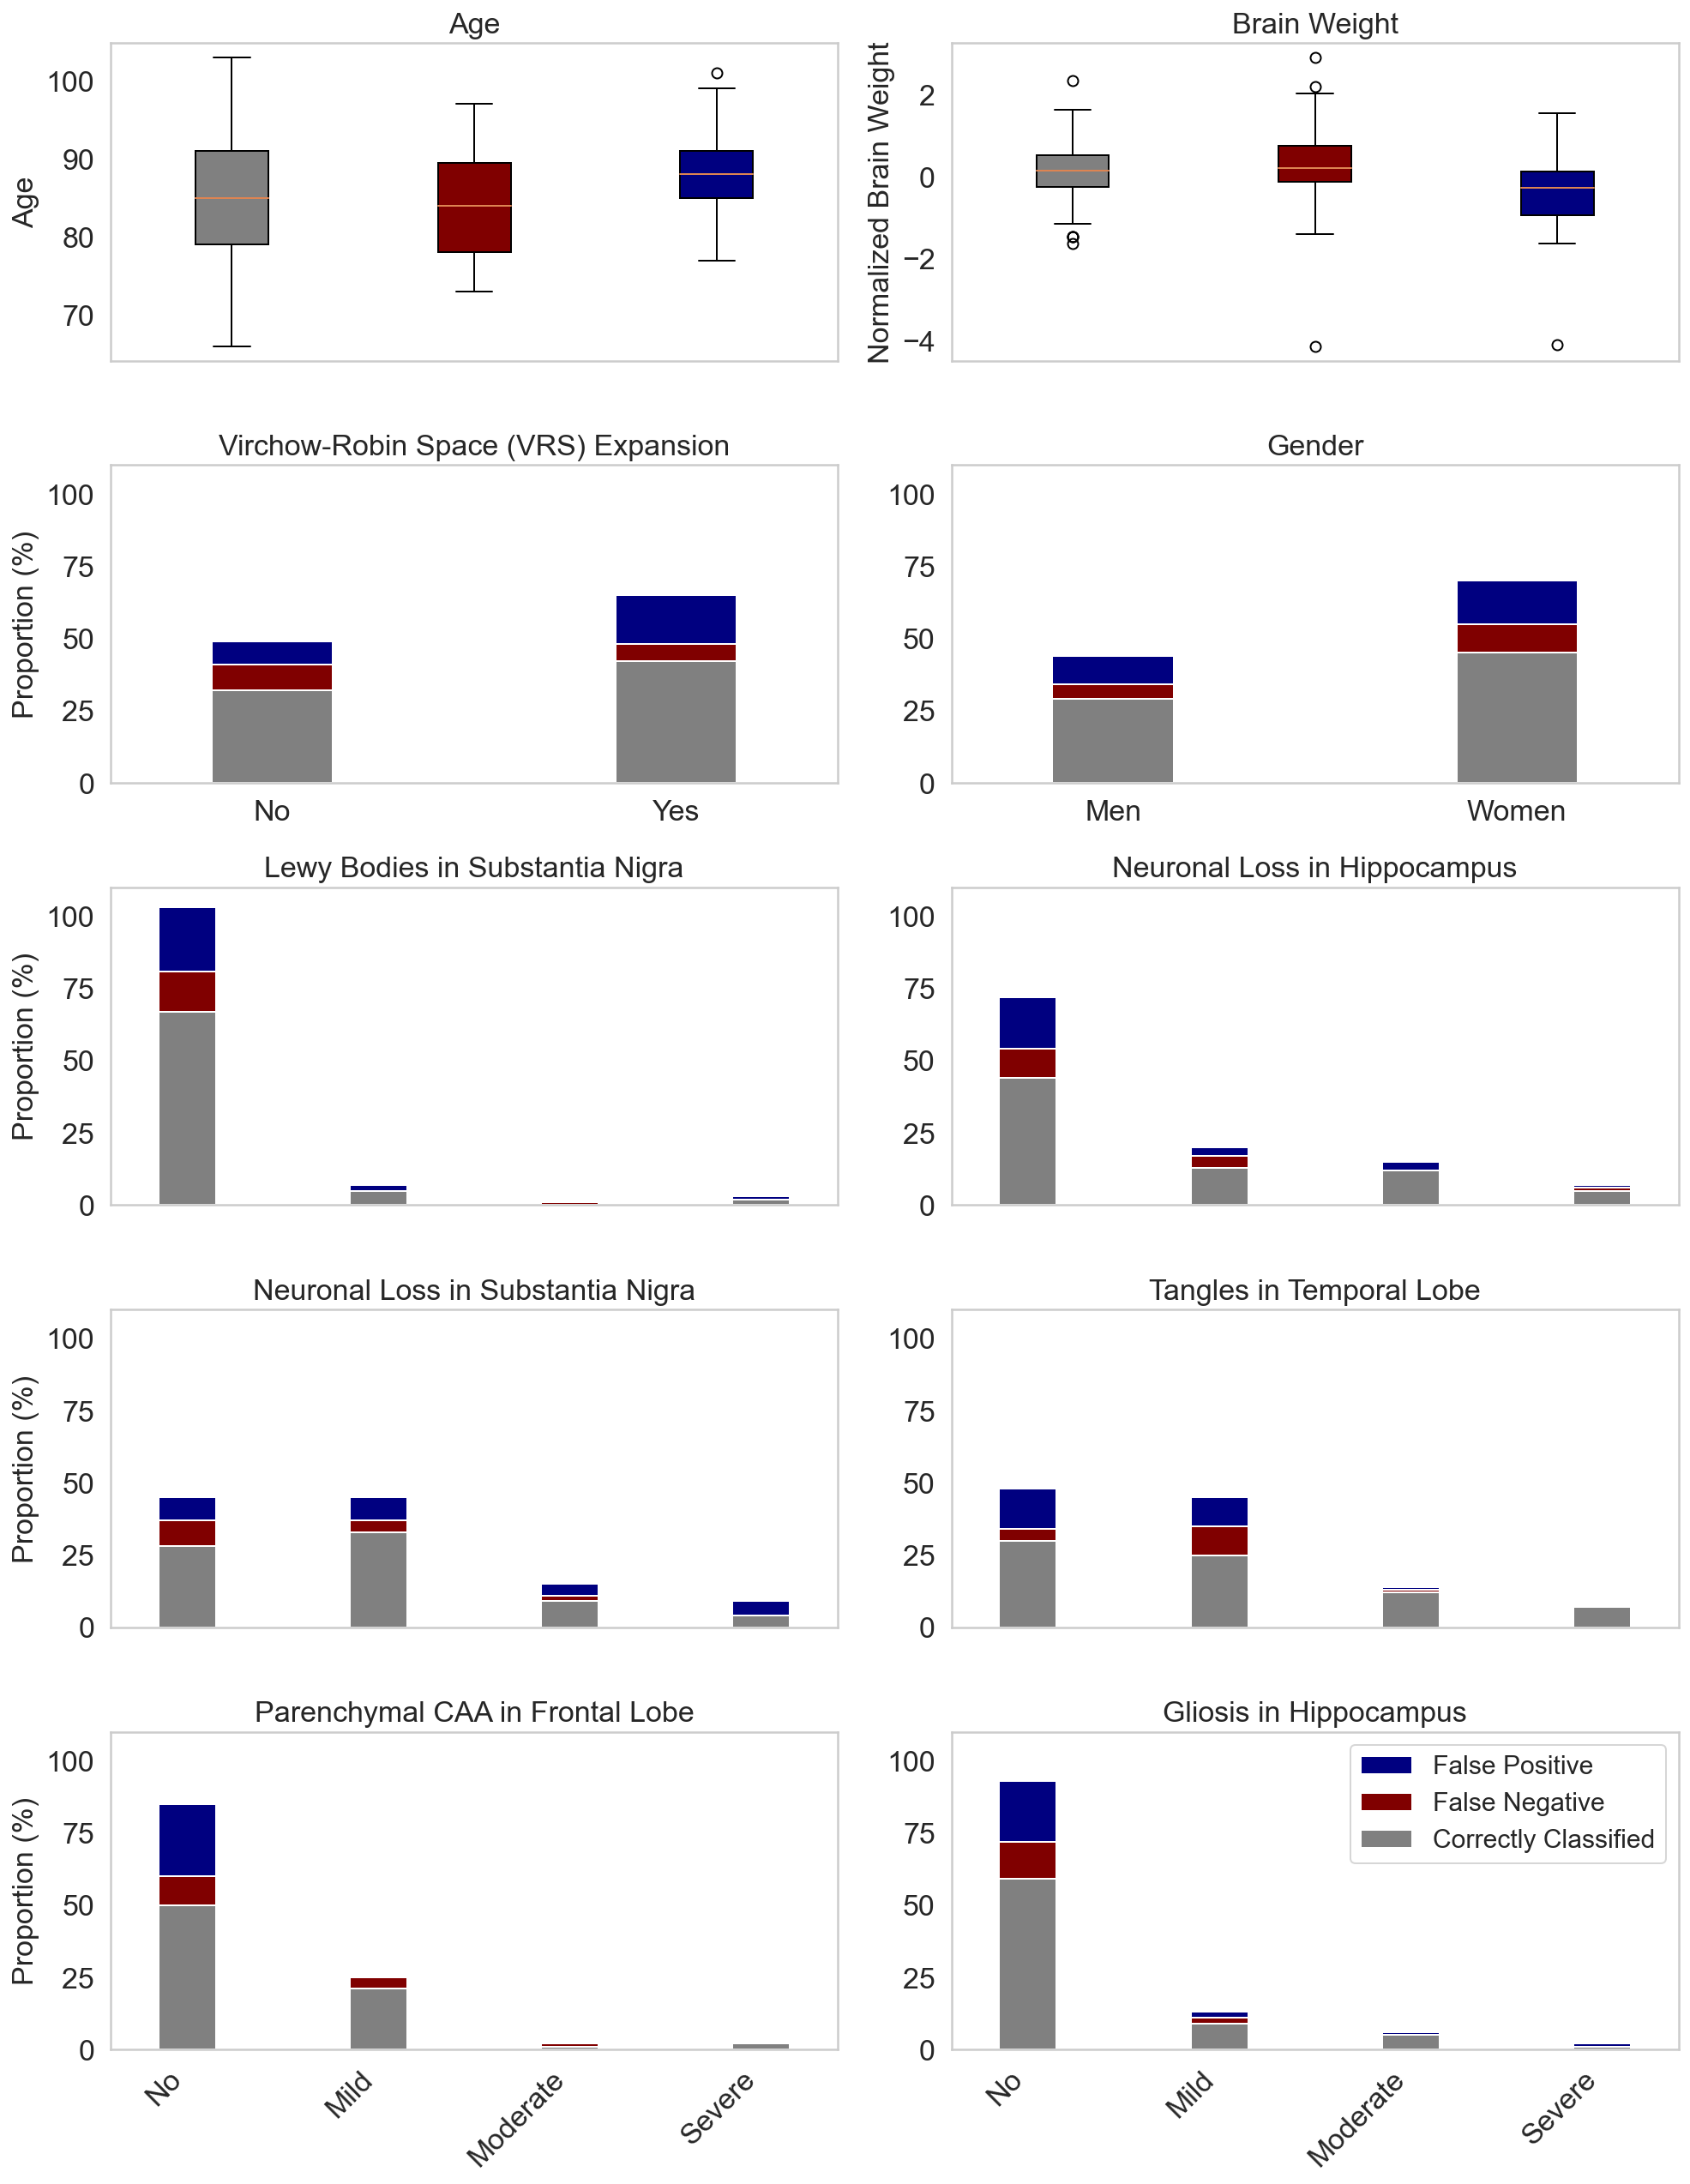

In [230]:
# labels_order =['Severe', 'Moderate', 'Mild', 'No']
labels_order =['No', 'Mild', 'Moderate', 'Severe']
legend_order = ['False Positive', 'False Negative', 'Correctly Classified']
width = 0.3

%config InlineBackend.figure_format ='retina'
sns.set_style("whitegrid", {'axes.grid' : False})
#     plt.rcParams['font.size'] = '21'
size = 17
plt.rc('font', size=size)          # controls default text sizes
plt.rc('axes', titlesize=size)     # fontsize of the axes title
plt.rc('axes', labelsize=size)    # fontsize of the x and y labels
plt.rc('ytick', labelsize=size)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('xtick', labelsize=size)    # fontsize of the tick labels

red=(0.5, 0.0, 0.0, 1.0)
blue=(0.0, 0.0, 0.5, 1.0)
grey=(0.5, 0.5, 0.5, 1.0)

bar_colors = ['g', 'b', 'orange', 'r']
plt.subplots_adjust(wspace=0.35)
fig= plt.figure(figsize=(14,18))

ax = plt.subplot(5,2,1)
age_FP = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'FP']['age']
age_FN = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'FN']['age']
age_correctly = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'TP&TN']['age']
dataset = [age_correctly, age_FN, age_FP]
labels = ['Correctly Classified', 'False Negative', 'False Positive']
bplot = ax.boxplot(dataset,vert=True,patch_artist=True,labels=labels)
colors = [grey, red, blue]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
# ax.boxplot(dataset,vert=True, patch_artist=True,labels=labels)
plt.xlabel('')
plt.ylabel('Age')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title('Age')
plt.xticks(rotation=0)
ax.set_xticks([])

ax = plt.subplot(5,2,2)
brain_weight_FP = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'FP']['brain weight']
brain_weight_FN = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'FN']['brain weight']
brain_weight_correctly = dataset_membership_with_case2[dataset_membership_with_case2['membership'] == 'TP&TN']['brain weight']
dataset = [brain_weight_correctly, brain_weight_FN, brain_weight_FP]
labels = ['Correctly Classified', 'False Negative', 'False Positive']
bplot = ax.boxplot(dataset,vert=True,patch_artist=True,labels=labels)
colors = [grey,red,blue]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.xlabel('')
# ax.set_xticks([])
plt.ylabel('Normalized Brain Weight')
# plt.title('Decision Tree')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title('Brain Weight')
plt.xticks(rotation=0)
ax.set_xticks([])

ax = plt.subplot(5,2,3)
bplot = dataset_membership_with_case2.groupby(['vrspc', 'cluster']).size().reset_index().pivot(columns='cluster', index='vrspc', values=0)
bplot.plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title('Virchow-Robin Space (VRS) Expansion')
plt.xticks(rotation=0)
plt.ylim(0,110)

ax = plt.subplot(5,2,4)
bplot = dataset_membership_with_case2.groupby(['sex', 'cluster']).size().reset_index().pivot(columns='cluster', index='sex', values=0)
bplot.plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.title("Gender")
plt.xticks(rotation=0)
plt.ylim(0,110)

ax = plt.subplot(5,2,5)
bplot = dataset_membership_with_case2.groupby(['lewys', 'cluster']).size().reset_index().pivot(columns='cluster', index='lewys', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
# ax.set_xticks([])
plt.title("Lewy Bodies in Substantia Nigra")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,6)
bplot = dataset_membership_with_case2.groupby(['lossh', 'cluster']).size().reset_index().pivot(columns='cluster', index='lossh', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
# plt.ylabel('Proportion (%)')
# ax.set_xticks([])
plt.title("Neuronal Loss in Hippocampus")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,7)
bplot = dataset_membership_with_case2.groupby(['losss', 'cluster']).size().reset_index().pivot(columns='cluster', index='losss', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.title("Neuronal Loss in Substantia Nigra")
plt.xticks(rotation=0)
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,8)
bplot = dataset_membership_with_case2.groupby(['tanglest', 'cluster']).size().reset_index().pivot(columns='cluster', index='tanglest', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.xlabel('')
# plt.ylabel('Proportion (%)')
plt.title("Tangles in Temporal Lobe")
# plt.xticks(rotation=45, horizontalalignment="right")
ax.set_xticks([])
plt.ylim(0,110)

ax = plt.subplot(5,2,9)
bplot = dataset_membership_with_case2.groupby(['amyparf', 'cluster']).size().reset_index().pivot(columns='cluster', index='amyparf', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, legend=False, color=colors)
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title("Parenchymal CAA in Frontal Lobe")
plt.xlabel('')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=45, horizontalalignment="right")
plt.ylim(0,110)

ax = plt.subplot(5,2,10)
bplot = dataset_membership_with_case2.groupby(['gliosh', 'cluster']).size().reset_index().pivot(columns='cluster', index='gliosh', values=0)
bplot.reindex(labels_order).plot(kind='bar', stacked=True, ax=ax, width=width, color=colors)
# plt.ylabel('Proportion (%)')
plt.xlabel('')
plt.tight_layout(pad=0.7, w_pad=0.2, h_pad=0.3)
plt.title("Gliosis in Hippocampus")
handles, labels = ax.get_legend_handles_labels()
dict_legends = dict(zip(labels, handles))
handles_order =[dict_legends[lo] for lo in legend_order]
ax.legend(handles_order, legend_order)

plt.xticks(rotation=45, horizontalalignment="right")
plt.ylim(0,110)


plt.tight_layout()
# plt.savefig('Figures/cluster_signature.png', dpi=300, bbox_inches='tight')
# plt.savefig('Figures/cluster_signature.pdf', dpi=300, bbox_inches='tight')


In [286]:
import statistics
all_age85 = dataset_membership_with_case2[dataset_membership_with_case2.age > 84]
all_age85.reset_index(inplace=True, drop=True)
all_age84 = dataset_membership_with_case2[dataset_membership_with_case2.age < 85]
all_age84.reset_index(inplace=True, drop=True)
print('----- Age >=85 ------')
print('Mean age >=85 = ', statistics.mean(all_age85.age))
print('\nCount age >=85:')
print(all_age85.membership.value_counts())

print('\n----- Age <85 ------')
print('Mean age <85 = ', statistics.mean(all_age84.age))
print('\nCount age <85:')
print(all_age84.membership.value_counts())


print('\n\n----- 35.1% for all age groups, the misclassified for <85 yrs old? and >=85yrs old? ------')
correct_age84 = all_age84[all_age84.membership == 'TP&TN']
misclassified_age84 = all_age84[(all_age84.membership == 'FP') | (all_age84.membership == 'FN')]

correct_age85 = all_age85[all_age85.membership == 'TP&TN']
misclassified_age85 = all_age85[(all_age85.membership == 'FP') | (all_age85.membership == 'FN')]

print('Number of cases >=85yrs = ', len(all_age85))
print('Number of cases <85yrs = ', len(all_age84))

print('\nMisclassified cases >=85yrs = ', len(misclassified_age85))
print('Misclassifiedcases <85yrs = ', len(misclassified_age84))

print('\nFor <85 years = ', round((len(misclassified_age84)/len(all_age84))*100,1),'%')
print('For >=85 years = ', round((len(misclassified_age85)/len(all_age85))*100,1),'%')

----- Age >=85 ------
Mean age >=85 =  90.80597014925372

Count age >=85:
TP&TN    40
FP       20
FN        7
Name: membership, dtype: int64

----- Age <85 ------
Mean age <85 =  77.97872340425532

Count age <85:
TP&TN    34
FN        8
FP        5
Name: membership, dtype: int64


----- 35.1% for all age groups, the misclassified for <85 yrs old? and >=85yrs old? ------
Number of cases >=85yrs =  67
Number of cases <85yrs =  47

Misclassified cases >=85yrs =  27
Misclassifiedcases <85yrs =  13

For <85 years =  27.7 %
For >=85 years =  40.3 %


In [285]:
dementia = dataset_membership_with_case2[(dataset_membership_with_case2.dem_nver4 == 'Dementia')]
no_dementia = dataset_membership_with_case2[(dataset_membership_with_case2.dem_nver4 == 'No dementia')]

TPTN = dataset_membership_with_case2[(dataset_membership_with_case2.membership == 'TP&TN')]
FPFN = dataset_membership_with_case2[~(dataset_membership_with_case2.membership == 'TP&TN')]
TP = TPTN[(TPTN.dem_nver4 == 'Dementia')]
TN = TPTN[(TPTN.dem_nver4 == 'No dementia')]
FP = dataset_membership_with_case2[dataset_membership_with_case2.membership == 'FP']
FN = dataset_membership_with_case2[dataset_membership_with_case2.membership == 'FN']

print('----- Mean Ages ------')
print('TP&TN = ', statistics.mean(TPTN.age))
print('FP&FN = ', statistics.mean(FPFN.age))
print('TP = ', statistics.mean(TP.age))
print('TN = ', statistics.mean(TN.age))
print('FP = ', statistics.mean(FP.age))
print('FN = ', statistics.mean(FN.age))

print('\n----- Mean Brain Weight ------')
print('TP&TN = ', statistics.mean(TPTN['brain weight']))
print('FP&FN = ', statistics.mean(FPFN['brain weight']))
print('TP = ', statistics.mean(TP['brain weight']))
print('TN = ', statistics.mean(TN['brain weight']))
print('FP = ', statistics.mean(FP['brain weight']))
print('FN = ', statistics.mean(FN['brain weight']))

----- Mean Ages ------
TP&TN =  84.74324324324324
FP&FN =  86.95
TP =  89.0625
TN =  81.45238095238095
FP =  88.52
FN =  84.33333333333333

----- Mean Brain Weight ------
TP&TN =  0.1085060645400496
FP&FN =  -0.20073621939909328
TP =  -0.13554667619234975
TN =  0.2944510098599729
FP =  -0.47077359354471626
FN =  0.24932607084361172


In [282]:
FPFN.shape

(40, 13)

In [281]:
TPTN

age amyparf  brain weight gliosh   lewys     lossh     losss    sex  \
0    91.0      No     -0.046747     No  Severe      Mild    Severe    Men   
2    86.0      No      0.396687     No      No      Mild        No    Men   
3    85.0      No     -0.032501     No      No        No      Mild  Women   
6    91.0      No     -0.519441     No      No        No        No  Women   
7    70.0      No      0.464908     No    Mild        No      Mild    Men   
..    ...     ...           ...    ...     ...       ...       ...    ...   
108  84.0  Severe      0.765762     No      No  Moderate      Mild  Women   
109  94.0      No      1.564024     No      No      Mild      Mild  Women   
110  99.0    Mild      0.765762     No      No        No      Mild  Women   
111  97.0    Mild      0.685936     No      No      Mild        No  Women   
113  87.0      No     -0.990416   Mild      No  Moderate  Moderate  Women   

    tanglest vrspc    dem_nver4 membership               cluster  
0         No    No     Dementia      TP&TN  Correctly Classified  
2         No   Yes  No dementia      TP&TN  Correctly Classified  
3       Mild    No  No dementia      TP&TN  Correctly Classified  
6       Mild   Yes  No dementia      TP&TN  Correctly Classified  
7         No   Yes  No dementia      TP&TN  Correctly Classified  
..       ...   ...          ...        ...                   ...  
108   Severe    No     Dementia      TP&TN  Correctly Classified  
109     Mild    No     Dementia      TP&TN  Correctly Classified  
110     Mild   Yes     Dementia      TP&TN  Correctly Classified  
111   Severe   Yes     Dementia      TP&TN  Correctly Classified  
113   Severe    No     Dementia      TP&TN  Correctly Classified  

[74 rows x 13 columns]